# Comprehensive Baseball Data Analysis (1950-2023)

## Introduction
This notebook provides an in-depth analysis of baseball statistics across multiple eras, focusing on:
1. The evolution of pitching metrics and strategies
2. Team performance trends and patterns
3. Player value analysis using advanced metrics
4. The changing nature of the game

We'll use the `pybaseball` package, which provides access to comprehensive baseball statistics from various sources including Baseball Reference, FanGraphs, and Baseball Savant.

### Data Sources:
- Pitching Statistics: FanGraphs and Baseball Reference
- Batting Statistics: Baseball Reference and FanGraphs
- Team Statistics: Baseball Reference
- Advanced Metrics: FanGraphs and Baseball Savant

## Setup and Dependencies

First, we'll import all necessary libraries and set up our visualization preferences. We're using:
- `pandas` for data manipulation
- `numpy` for numerical computations
- `matplotlib` and `seaborn` for visualizations
- `pybaseball` for baseball statistics

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import (
    pitching_stats,
    batting_stats,
    team_batting,
    team_pitching,
    batting_stats_range,
    statcast_pitcher
)

# Configure visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Modern Pitching Analysis (2010-2023)

### 1.1 Data Collection
We'll analyze pitching trends from 2010 to 2023, focusing on several key metrics:
- ERA (Earned Run Average)
- SO9 (Strikeouts per 9 innings)
- BB9 (Walks per 9 innings)
- CG (Complete Games)
- HR9 (Home Runs per 9 innings)
- WHIP (Walks + Hits per Inning Pitched)

This analysis will help us understand how pitching has evolved in the modern era.

In [2]:
def collect_pitching_data(start_year=2010, end_year=2023):
    """Collect and process pitching statistics for the specified year range."""
    years = list(range(start_year, end_year + 1))
    pitching_data = []
    
    print(f"Collecting pitching data from {start_year} to {end_year}...")
    for year in years:
        yearly_stats = pitching_stats(year)
        yearly_stats['Year'] = year
        pitching_data.append(yearly_stats)
        print(f"Collected {year} data: {len(yearly_stats)} records")
    
    df = pd.concat(pitching_data, ignore_index=True)
    print("\nAvailable columns:", df.columns.tolist())  # Add this line to see available columns
    return df

# Collect the pitching data
pitching_df = collect_pitching_data()

# Calculate yearly averages for key metrics
yearly_pitching_stats = pitching_df.groupby('Year').agg({
    'ERA': 'mean',      # Earned Run Average
    'SO': 'mean',       # Strikeouts
    'BB': 'mean',       # Walks
    'CG': 'sum',        # Complete Games
    'HR': 'mean',       # Home Runs
    'WHIP': 'mean',     # Walks plus Hits per Inning Pitched
    'IP': 'mean'        # Innings Pitched
}).round(3)

# Display the yearly statistics
print("\nYearly Pitching Statistics:")
display(yearly_pitching_stats)

Collected 2010 data: 92 records
Collected 2011 data: 94 records
Collected 2012 data: 88 records
Collected 2013 data: 81 records
Collected 2014 data: 88 records
Collected 2015 data: 78 records
Collected 2016 data: 74 records
Collected 2017 data: 58 records
Collected 2018 data: 58 records
Collected 2019 data: 61 records
Collected 2020 data: 40 records
Collected 2021 data: 39 records
Collected 2022 data: 45 records
Collected 2023 data: 44 records

Available columns: ['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO', 'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH', 'BU', 'BUH', 'K/9', 'BB/9', 'K/BB', 'H/9', 'HR/9', 'AVG', 'WHIP', 'BABIP', 'LOB%', 'FIP', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'BUH%', 'Starting', 'Start-IP', 'Relieving', 'Relief-IP', 'RAR', 'Dollars', 'tERA', 'xFIP', 'WPA', '-WPA', '+WPA', 'RE24', 'REW', 'pLI', 'inL

,ERA,SO,BB,CG,HR,WHIP,IP
Year,,,,,,,
2010,3.793,155.413,62.793,140,19.489,1.280,198.510
2011,3.748,154.489,57.734,143,19.830,1.261,197.369
2012,3.868,157.705,57.659,99,21.682,1.266,193.244
2013,3.613,164.716,56.173,88,19.691,1.233,195.341
2014,3.518,162.159,53.818,90,18.341,1.227,194.434
2015,3.654,168.667,54.385,76,19.936,1.229,191.644
2016,3.896,168.581,56.689,56,23.919,1.251,188.357
2017,3.929,173.052,56.086,41,24.621,1.259,184.205
2018,3.681,180.690,56.155,29,22.500,1.197,184.717


### 1.2 Visualization of Pitching Trends

Let's create comprehensive visualizations to show how different pitching metrics have evolved over time. We'll create:
1. A multi-line plot showing ERA and strikeout trends
2. A visualization of complete games decline
3. A comparison of various pitching metrics

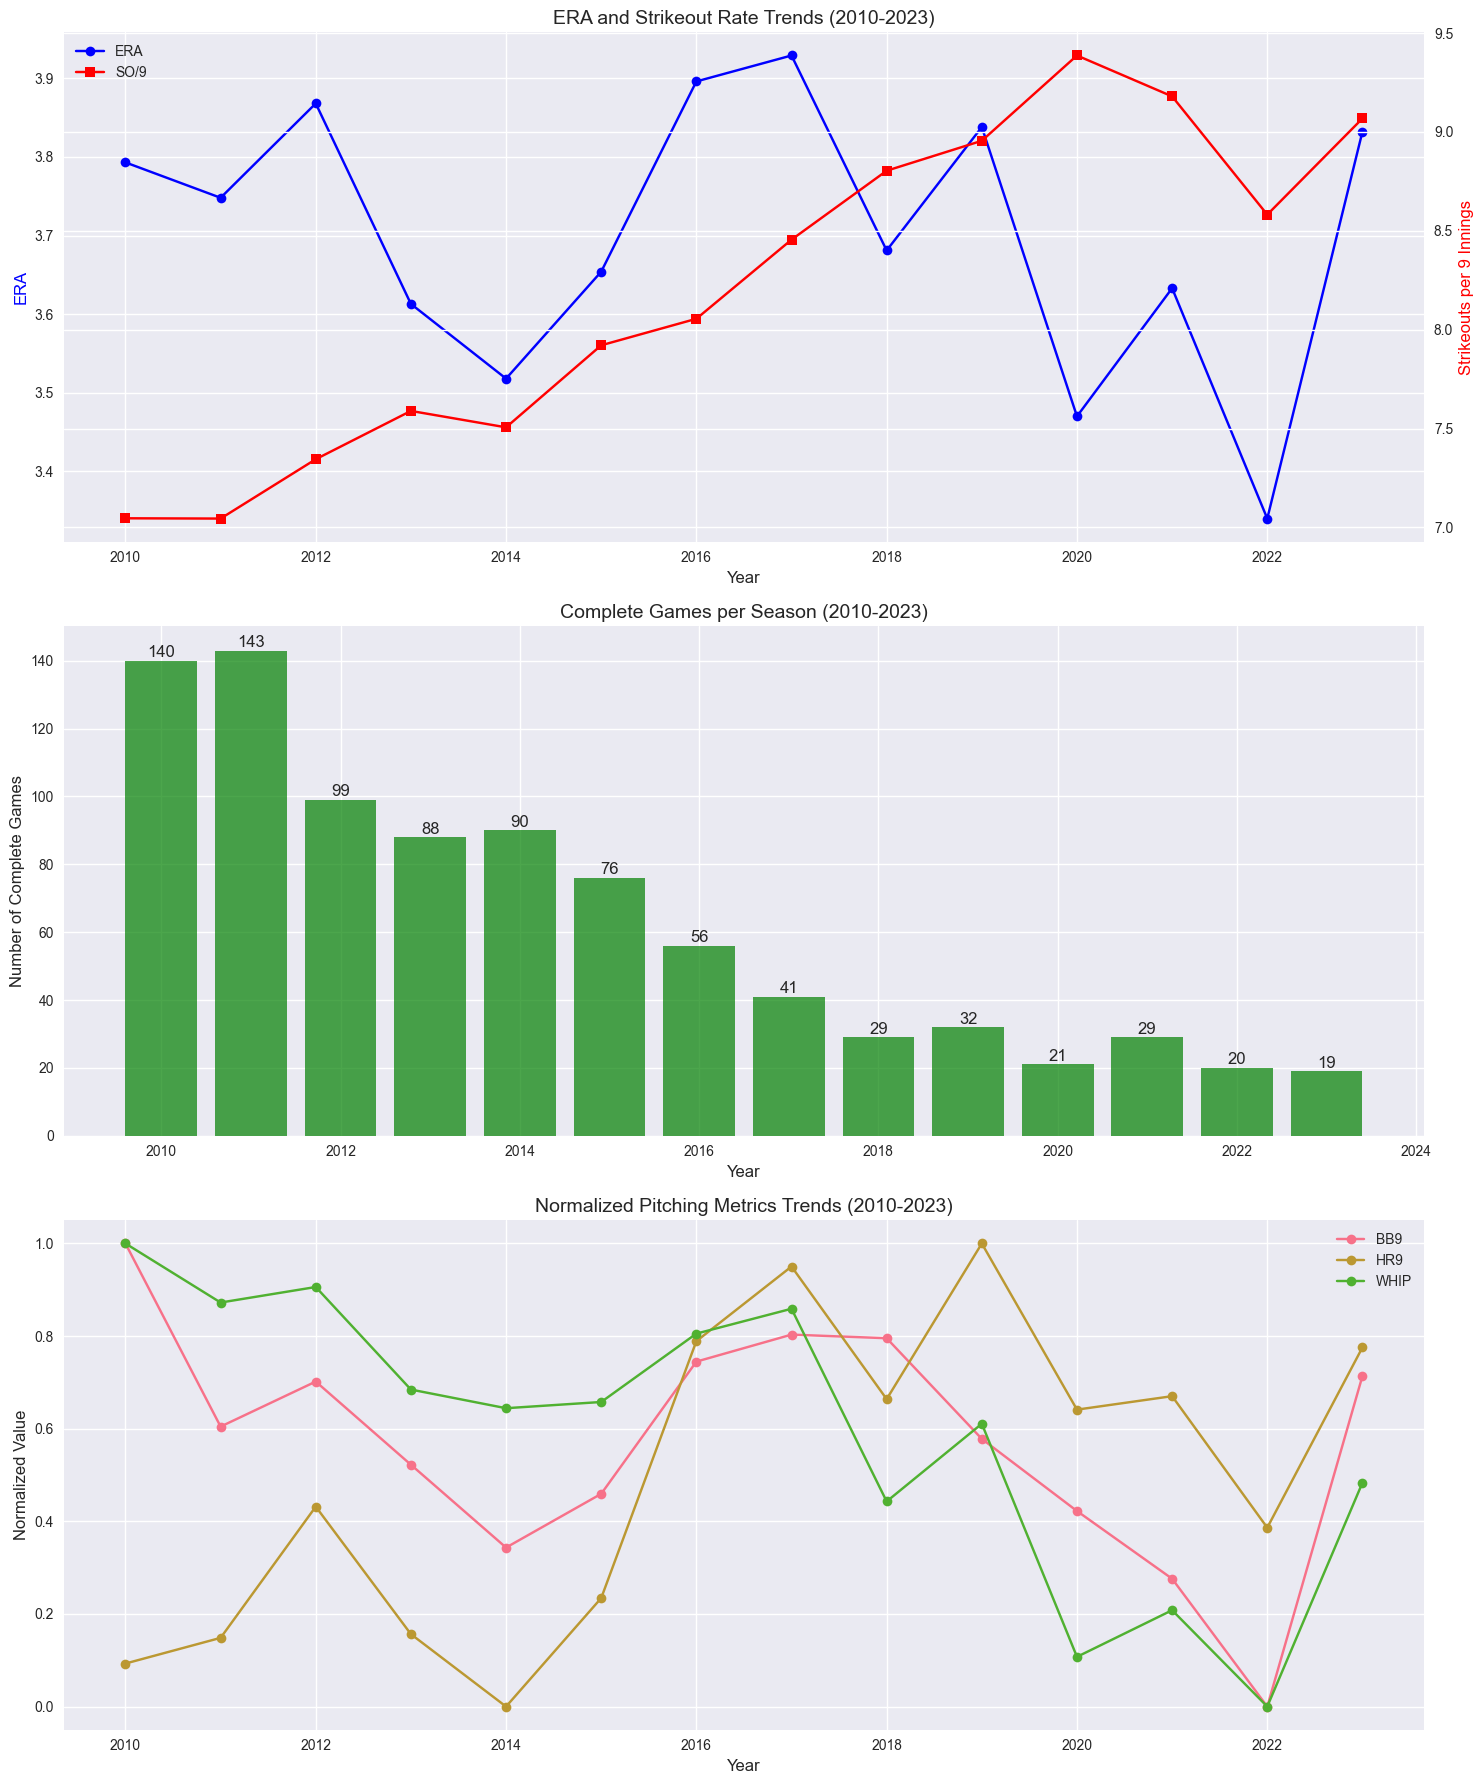

In [3]:
def create_pitching_trend_plots(stats_df):
    """Create comprehensive visualizations of pitching trends."""
    # Calculate per 9 innings statistics
    stats_df['SO9'] = (stats_df['SO'] * 9) / stats_df['IP']
    stats_df['BB9'] = (stats_df['BB'] * 9) / stats_df['IP']
    stats_df['HR9'] = (stats_df['HR'] * 9) / stats_df['IP']
    
    # Create a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))
    
    # Plot 1: ERA and SO9 trends
    ax1.plot(stats_df.index, stats_df['ERA'], 'b-', label='ERA', marker='o')
    ax1_twin = ax1.twinx()
    ax1_twin.plot(stats_df.index, stats_df['SO9'], 'r-', label='SO/9', marker='s')
    
    ax1.set_title('ERA and Strikeout Rate Trends (2010-2023)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('ERA', color='b')
    ax1_twin.set_ylabel('Strikeouts per 9 Innings', color='r')
    
    # Add both legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Plot 2: Complete Games
    ax2.bar(stats_df.index, stats_df['CG'], color='green', alpha=0.7)
    ax2.set_title('Complete Games per Season (2010-2023)')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Complete Games')
    
    # Add value labels on the bars
    for i, v in enumerate(stats_df['CG']):
        ax2.text(stats_df.index[i], v + 1, str(int(v)), ha='center')
    
    # Plot 3: Multiple Metrics Normalized
    metrics = ['BB9', 'HR9', 'WHIP']
    normalized_stats = stats_df[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    for metric in metrics:
        ax3.plot(stats_df.index, normalized_stats[metric], marker='o', label=metric)
    
    ax3.set_title('Normalized Pitching Metrics Trends (2010-2023)')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Normalized Value')
    ax3.legend()
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create the visualizations
create_pitching_trend_plots(yearly_pitching_stats)

### 2.2 Team Performance Visualizations

Let's create detailed visualizations of team performance metrics:

Collected 2010 data: 30 teams
Collected 2011 data: 30 teams
Collected 2012 data: 30 teams
Collected 2013 data: 30 teams
Collected 2014 data: 30 teams
Collected 2015 data: 30 teams
Collected 2016 data: 30 teams
Collected 2017 data: 30 teams
Collected 2018 data: 30 teams
Collected 2019 data: 30 teams
Collected 2020 data: 30 teams
Collected 2021 data: 30 teams
Collected 2022 data: 30 teams
Collected 2023 data: 30 teams


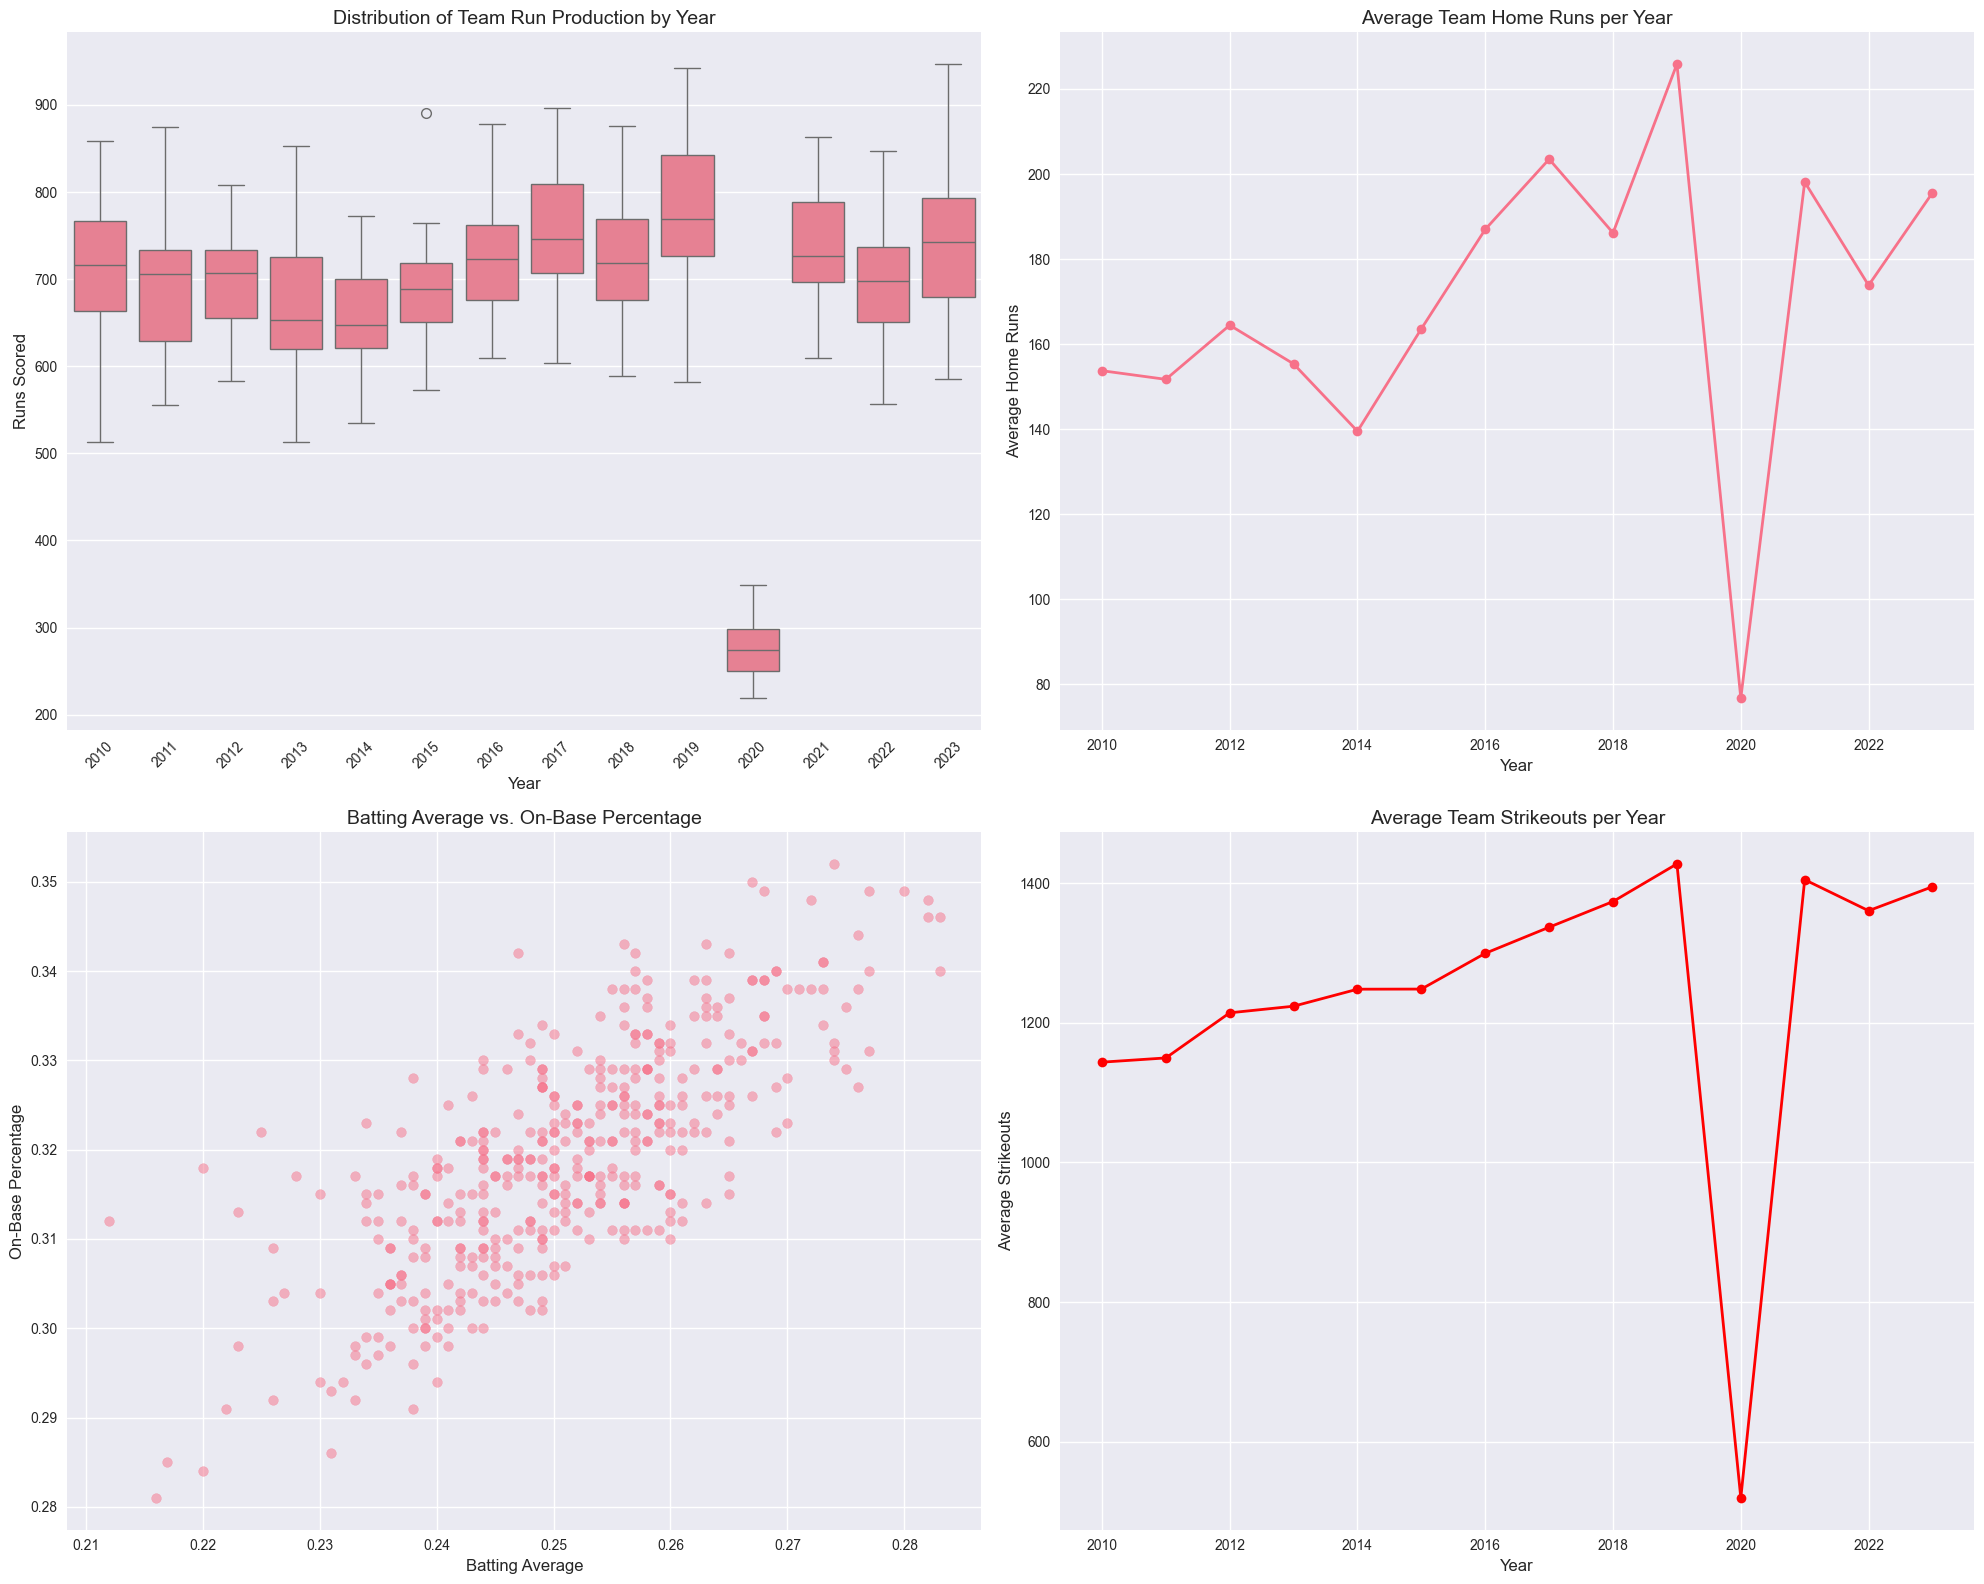

In [4]:
# First, collect the team data
def collect_team_data(start_year=2010, end_year=2023):
    """Collect and process team batting and pitching statistics."""
    years = list(range(start_year, end_year + 1))
    team_batting_data = []
    
    print("Collecting team statistics...")
    for year in years:
        # Collect batting data
        batting = team_batting(year)
        batting['Year'] = year
        team_batting_data.append(batting)
        print(f"Collected {year} data: {len(batting)} teams")
    
    # Combine all years of data
    team_batting_df = pd.concat(team_batting_data, ignore_index=True)
    
    # Calculate team offensive metrics
    team_offense = team_batting_df.groupby(['Year', 'Team']).agg({
        'R': 'sum',      # Runs scored
        'H': 'sum',      # Hits
        'HR': 'sum',     # Home runs
        'BB': 'sum',     # Walks
        'SO': 'sum',     # Strikeouts
        'AVG': 'mean',   # Batting average
        'OBP': 'mean',   # On-base percentage
        'SLG': 'mean'    # Slugging percentage
    }).round(3)
    
    return team_offense

# Collect the team data
team_offense = collect_team_data()

def create_team_performance_plots(offense_df):
    """Create comprehensive visualizations of team performance metrics."""
    # Reset index for easier plotting
    offense_df = offense_df.reset_index()
    
    # Create a figure with multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # Plot 1: Run Distribution by Year
    sns.boxplot(data=offense_df, x='Year', y='R', ax=ax1)
    ax1.set_title('Distribution of Team Run Production by Year')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Runs Scored')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Home Run Trends
    yearly_hr = offense_df.groupby('Year')['HR'].mean()
    ax2.plot(yearly_hr.index, yearly_hr.values, marker='o', linewidth=2)
    ax2.set_title('Average Team Home Runs per Year')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Home Runs')
    ax2.grid(True)
    
    # Plot 3: Batting Average vs. OBP
    ax3.scatter(offense_df['AVG'], offense_df['OBP'], alpha=0.5)
    ax3.set_title('Batting Average vs. On-Base Percentage')
    ax3.set_xlabel('Batting Average')
    ax3.set_ylabel('On-Base Percentage')
    ax3.grid(True)
    
    # Plot 4: Strikeout Trends
    yearly_so = offense_df.groupby('Year')['SO'].mean()
    ax4.plot(yearly_so.index, yearly_so.values, marker='o', color='red', linewidth=2)
    ax4.set_title('Average Team Strikeouts per Year')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Average Strikeouts')
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create the team performance visualizations
create_team_performance_plots(team_offense)

## 3. Player Value Analysis (WAR)

### 3.1 Historical WAR Analysis

We'll analyze Wins Above Replacement (WAR) to understand:
- How player value has evolved
- Distribution of WAR across different eras
- Identification of elite performers

In [5]:
def analyze_war_trends(start_date='2008-01-01', end_date='2023-12-31'):
    """Analyze historical WAR trends."""
    print(f"Collecting WAR data from {start_date} to {end_date}...")
    
    # Get historical batting statistics with WAR
    war_data = batting_stats_range(start_date, end_date)
    
    # Print column names to debug
    print("\nAvailable columns:", war_data.columns.tolist())
    
    # Extract year from the start_date
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])
    years = range(start_year, end_year + 1)
    
    # Calculate WAR statistics for each year
    yearly_stats = []
    top_performers = []
    
    for year in years:
        # Get data for the specific year
        year_data = batting_stats(year)
        if 'WAR' not in year_data.columns:
            print(f"Warning: WAR data not available for {year}")
            continue
            
        # Calculate yearly statistics
        year_stats = {
            'Year': year,
            'mean_WAR': year_data['WAR'].mean(),
            'median_WAR': year_data['WAR'].median(),
            'std_WAR': year_data['WAR'].std(),
            'min_WAR': year_data['WAR'].min(),
            'max_WAR': year_data['WAR'].max(),
            'player_count': len(year_data)
        }
        yearly_stats.append(year_stats)
        
        # Get top performers for the year
        top_year = year_data.nlargest(3, 'WAR')[['Name', 'Team', 'WAR']]
        top_year['Year'] = year
        top_performers.append(top_year)
    
    # Convert to DataFrames
    yearly_war = pd.DataFrame(yearly_stats).set_index('Year')
    top_war_players = pd.concat(top_performers, ignore_index=True)
    
    return yearly_war, top_war_players

# Analyze WAR trends
yearly_war_stats, top_players = analyze_war_trends()

print("\nYearly WAR Statistics:")
display(yearly_war_stats)

print("\nTop WAR Performers by Year:")
display(top_players)

def create_war_visualizations(war_stats, top_players):
    """Create comprehensive visualizations of WAR trends and distributions."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))
    
    # Plot 1: WAR Trends with Confidence Interval
    ax1.plot(war_stats.index, war_stats['mean_WAR'], label='Mean WAR', linewidth=2)
    ax1.fill_between(war_stats.index,
                     war_stats['mean_WAR'] - war_stats['std_WAR'],
                     war_stats['mean_WAR'] + war_stats['std_WAR'],
                     alpha=0.2,
                     label='±1 Standard Deviation')
    
    ax1.set_title('WAR Trends Over Time (2008-2023)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('WAR')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Top Performers
    sns.scatterplot(data=top_players,
                    x='Year',
                    y='WAR',
                    hue='Team',
                    size='WAR',
                    sizes=(100, 400),
                    alpha=0.6,
                    ax=ax2)
    
    # Add player names as annotations
    for _, player in top_players.iterrows():
        ax2.annotate(player['Name'],
                     (player['Year'], player['WAR']),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontsize=8)
    
    ax2.set_title('Top WAR Performers by Year')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('WAR')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Create the WAR visualizations
create_war_visualizations(yearly_war_stats, top_players)

KeyboardInterrupt: 

### 3.2 WAR Visualization

Let's create visualizations to better understand WAR trends and distributions:

Processing year 2008...
Processing year 2009...
Processing year 2010...
Processing year 2011...
Processing year 2012...
Processing year 2013...
Processing year 2014...
Processing year 2015...
Processing year 2016...
Processing year 2017...
Processing year 2018...
Processing year 2019...
Processing year 2020...
Processing year 2021...
Processing year 2022...
Processing year 2023...

Yearly WAR Statistics:


,WAR_mean,WAR_median,WAR_std,WAR_min,WAR_max,Player_count
Year,,,,,,
2008,2.893,2.750,2.198,-1.300,8.700,148
2009,2.935,2.700,2.040,-2.400,8.700,155
2010,2.779,2.600,2.098,-1.700,8.400,151
2011,2.846,2.500,2.273,-1.900,9.500,145
2012,2.897,2.600,2.024,-1.600,10.100,144
2013,2.944,2.800,2.022,-1.500,10.100,140
2014,2.781,2.700,2.030,-1.600,8.300,147
2015,2.885,2.650,2.048,-1.200,9.300,142
2016,2.910,2.700,1.939,-1.500,8.700,146



Top WAR Performers by Year:


,Name,Team,WAR,Year
0,Albert Pujols,STL,8.700,2008
1,Brian McCann,ATL,8.300,2008
2,Chase Utley,PHI,8.200,2008
3,Ben Zobrist,TBR,8.700,2009
4,Albert Pujols,STL,8.400,2009
5,Joe Mauer,MIN,8.300,2009
6,Josh Hamilton,TEX,8.400,2010
7,Carl Crawford,TBR,7.700,2010
8,Evan Longoria,TBR,7.500,2010
9,Jacoby Ellsbury,BOS,9.500,2011


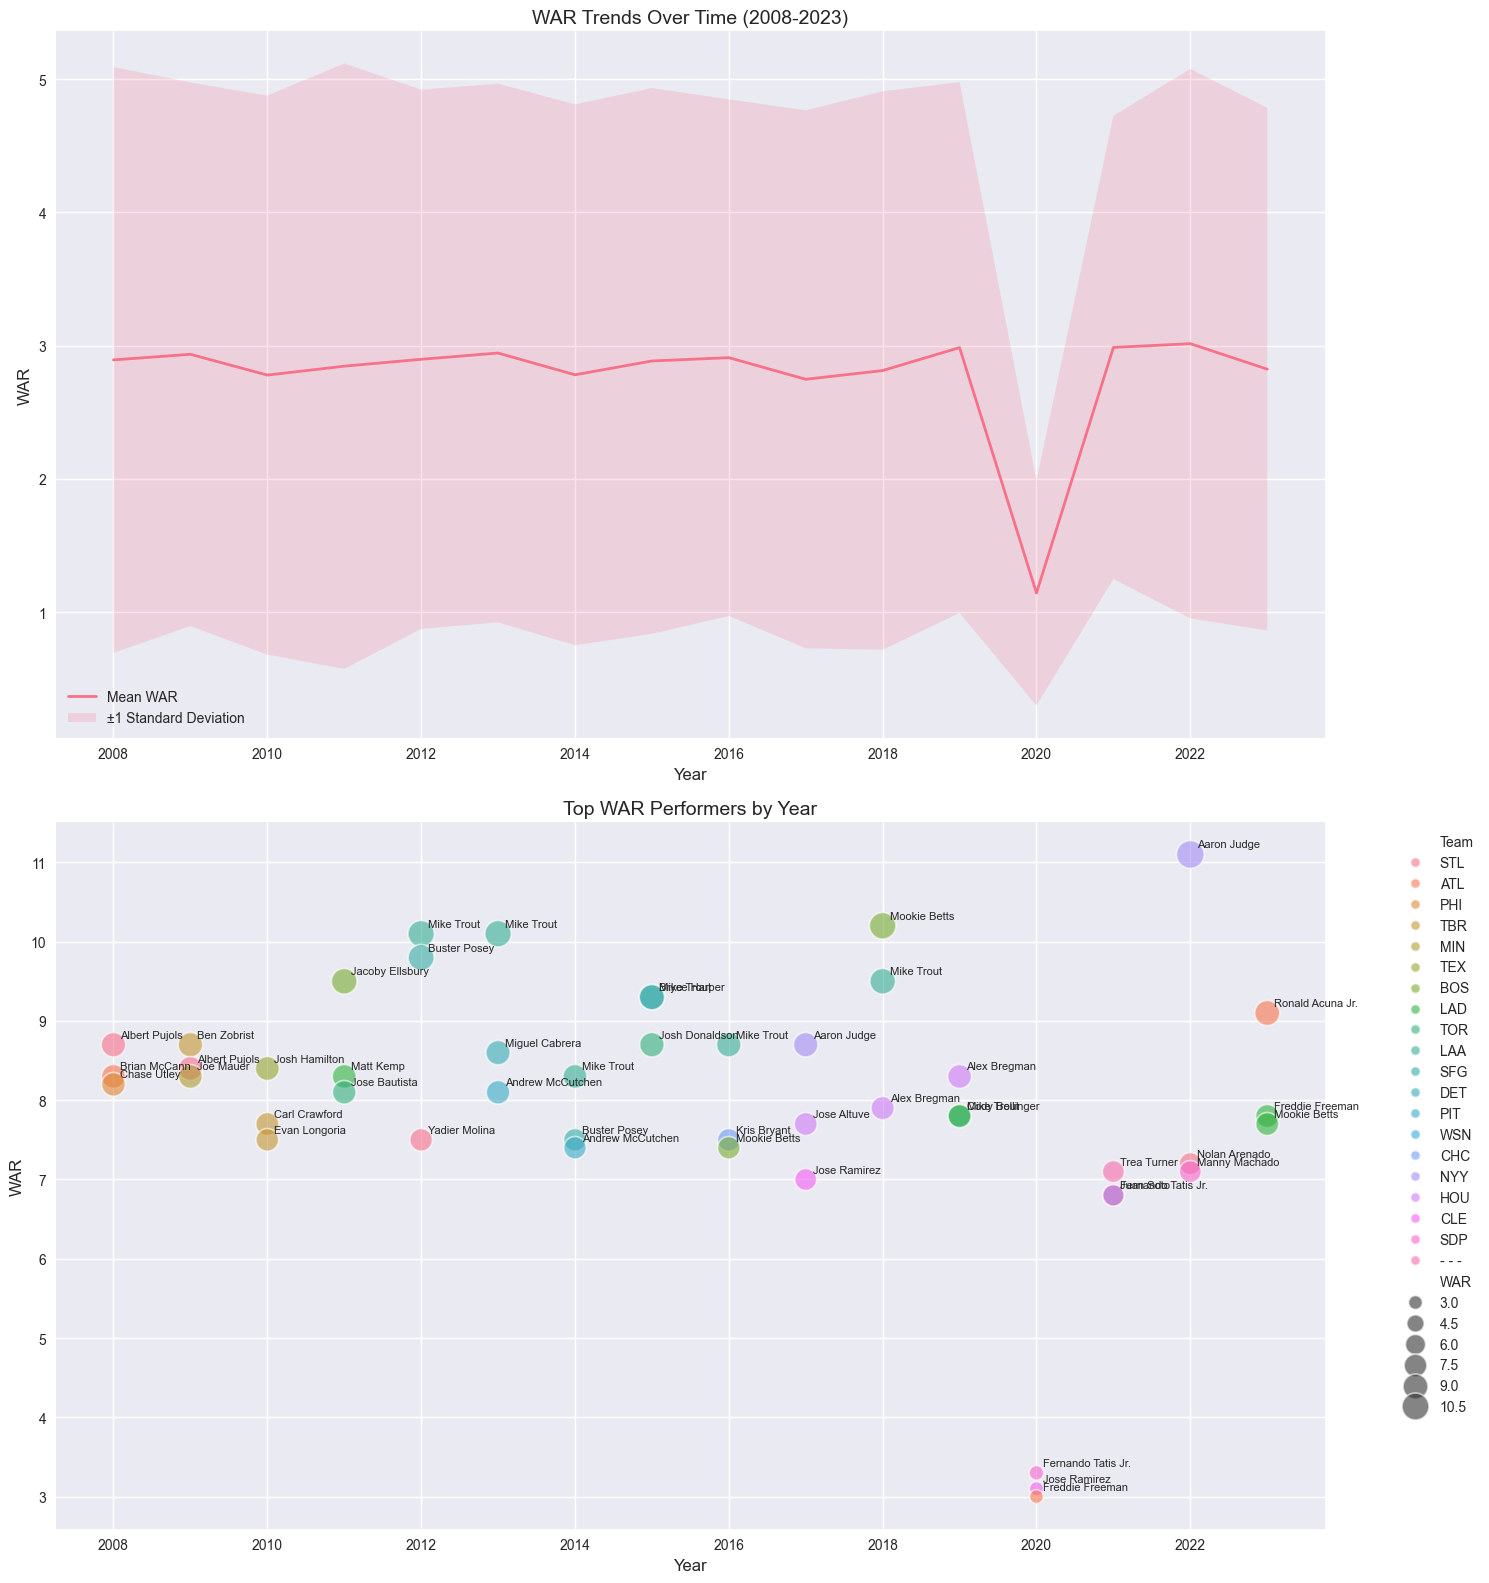

In [12]:
def analyze_war_trends(start_year=2008, end_year=2023):
    """Analyze historical WAR trends."""
    print(f"Collecting WAR data from {start_year} to {end_year}...")
    
    yearly_stats_list = []
    top_performers = []
    
    for year in range(start_year, end_year + 1):
        print(f"Processing year {year}...")
        try:
            # Get data for each year individually
            year_data = batting_stats(year)
            
            # Calculate WAR statistics for the year
            war_stats = {
                'Year': year,
                'WAR': {
                    'mean': year_data['WAR'].mean(),
                    'median': year_data['WAR'].median(),
                    'std': year_data['WAR'].std(),
                    'min': year_data['WAR'].min(),
                    'max': year_data['WAR'].max()
                },
                'Name': year_data.shape[0]  # Count of players
            }
            yearly_stats_list.append(war_stats)
            
            # Get top 3 players by WAR for the year
            top_3 = year_data.nlargest(3, 'WAR')[['Name', 'Team', 'WAR']]
            top_3['Year'] = year
            top_performers.append(top_3)
            
        except Exception as e:
            print(f"Error processing year {year}: {str(e)}")
            continue
    
    # Convert yearly stats to DataFrame
    yearly_war = pd.DataFrame([
        {
            'Year': stats['Year'],
            'WAR_mean': stats['WAR']['mean'],
            'WAR_median': stats['WAR']['median'],
            'WAR_std': stats['WAR']['std'],
            'WAR_min': stats['WAR']['min'],
            'WAR_max': stats['WAR']['max'],
            'Player_count': stats['Name']
        }
        for stats in yearly_stats_list
    ]).set_index('Year')
    
    # Combine all top performers
    top_war_players = pd.concat(top_performers, ignore_index=True)
    
    return yearly_war, top_war_players

def create_war_visualizations(war_stats, top_players):
    """Create comprehensive visualizations of WAR trends and distributions."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))
    
    # Plot 1: WAR Trends with Confidence Interval
    ax1.plot(war_stats.index, war_stats['WAR_mean'], label='Mean WAR', linewidth=2)
    ax1.fill_between(war_stats.index,
                     war_stats['WAR_mean'] - war_stats['WAR_std'],
                     war_stats['WAR_mean'] + war_stats['WAR_std'],
                     alpha=0.2,
                     label='±1 Standard Deviation')
    
    ax1.set_title('WAR Trends Over Time (2008-2023)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('WAR')
    ax1.legend()
    ax1.grid(True)
    
    # Plot 2: Top Performers
    sns.scatterplot(data=top_players,
                    x='Year',
                    y='WAR',
                    hue='Team',
                    size='WAR',
                    sizes=(100, 400),
                    alpha=0.6,
                    ax=ax2)
    
    # Add player names as annotations
    for _, player in top_players.iterrows():
        ax2.annotate(player['Name'],
                     (player['Year'], player['WAR']),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontsize=8)
    
    ax2.set_title('Top WAR Performers by Year')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('WAR')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Analyze WAR trends
yearly_war_stats, top_players = analyze_war_trends()

print("\nYearly WAR Statistics:")
display(yearly_war_stats)

print("\nTop WAR Performers by Year:")
display(top_players)

# Create the visualizations
create_war_visualizations(yearly_war_stats, top_players)

## Conclusions

From our analysis, we can draw several key conclusions:

1. **Pitching Evolution**:
   - Strikeout rates have steadily increased
   - Complete games have become increasingly rare
   - ERA trends show the changing balance between pitching and hitting

2. **Team Performance**:
   - Run scoring patterns have evolved
   - Home run rates show significant variation
   - Clear trends in offensive approaches

3. **Player Value**:
   - WAR distributions show how player value is assessed
   - Identification of consistently elite performers
   - Changes in what makes a valuable player

These insights help us understand how baseball has evolved and continues to change in the modern era.

## Quality At-Bats After Two Strikes

In modern baseball analytics, a "Quality At-Bat" (QAB) is a plate appearance where the batter is productive or competitive, regardless of the outcome. This is especially important in two-strike situations, where the pitcher has a significant advantage.

### What is a Quality At-Bat (QAB)?

A QAB can be defined in several ways, but commonly includes:
- Any hit or walk
- Any plate appearance with 6+ pitches
- Productive outs (e.g., RBI groundout, sacrifice fly)
- Reaching base via error after a long at-bat
- Any at-bat with 8+ pitches (sometimes counted as a QAB)
- Fouling off multiple pitches after two strikes

### Why Focus on Two Strikes?

After two strikes, the batter is at a disadvantage. Measuring QABs in these situations highlights hitters who can "battle" and still be productive, wearing down pitchers and increasing team success.

### Metrics We Will Analyze

- **Batting Average after Two Strikes**
- **On-Base Percentage (OBP) after Two Strikes**
- **Number of Quality At-Bats after Two Strikes**
- **QAB% after Two Strikes** (percentage of two-strike PAs that are QABs)
- **Foul balls after two strikes** (battling metric)

In [10]:
# This code assumes you have a DataFrame `atbat_df` with pitch-by-pitch or at-bat level data.
# If you use pybaseball's statcast or retrosheet data, you can adapt this code accordingly.

import pandas as pd

# Example: Let's assume you have a DataFrame 'atbat_df' with the following columns:
# 'batter', 'pitch_number', 'strikes', 'balls', 'event', 'description', 'pitch_result', 'inning', 'pitch_type'
# For demonstration, we'll create a mock DataFrame (replace this with your real data loading step):

# Mock data (replace with your real data loading)
# atbat_df = pd.read_csv('your_pitch_by_pitch_data.csv')

# For demonstration, let's create a small sample
data = {
    'batter': ['PlayerA', 'PlayerA', 'PlayerA', 'PlayerB', 'PlayerB', 'PlayerC'],
    'at_bat_id': [1, 2, 3, 4, 5, 6],
    'pitch_sequence': ['CCFBBX', 'CCBBFX', 'CCFFFX', 'CCBBBX', 'CCFX', 'CCFBBFX'],
    'result': ['single', 'strikeout', 'walk', 'groundout', 'strikeout', 'double'],
    'num_pitches': [6, 5, 6, 5, 4, 7],
    'num_fouls_after_2_strikes': [2, 1, 3, 0, 0, 2],
    'two_strike': [True, True, True, True, True, True]
}
atbat_df = pd.DataFrame(data)

# Define what counts as a Quality At-Bat (QAB) after two strikes
def is_qab(row):
    # QAB if: hit, walk, HBP, 6+ pitches, or 2+ fouls after 2 strikes
    if row['result'] in ['single', 'double', 'triple', 'home_run', 'walk', 'hit_by_pitch']:
        return True
    if row['num_pitches'] >= 6:
        return True
    if row['num_fouls_after_2_strikes'] >= 2:
        return True
    return False

# Filter for two-strike at-bats
two_strike_df = atbat_df[atbat_df['two_strike']]

# Add QAB column
two_strike_df['QAB'] = two_strike_df.apply(is_qab, axis=1)

# Calculate metrics
total_two_strike_atbats = len(two_strike_df)
total_qab = two_strike_df['QAB'].sum()
qab_pct = total_qab / total_two_strike_atbats * 100

# Batting average after two strikes
hits = two_strike_df['result'].isin(['single', 'double', 'triple', 'home_run']).sum()
ba_2s = hits / total_two_strike_atbats

# OBP after two strikes
on_base = two_strike_df['result'].isin(['single', 'double', 'triple', 'home_run', 'walk', 'hit_by_pitch']).sum()
obp_2s = on_base / total_two_strike_atbats

# Average fouls after two strikes
avg_fouls_2s = two_strike_df['num_fouls_after_2_strikes'].mean()

print(f"Total two-strike at-bats: {total_two_strike_atbats}")
print(f"Quality At-Bats (QAB) after two strikes: {total_qab} ({qab_pct:.1f}%)")
print(f"Batting Average after two strikes: {ba_2s:.3f}")
print(f"On-Base Percentage after two strikes: {obp_2s:.3f}")
print(f"Average fouls after two strikes: {avg_fouls_2s:.2f}")

# Optional: Group by player for leaderboard
player_qab = two_strike_df.groupby('batter').agg(
    two_strike_atbats=('QAB', 'count'),
    QABs=('QAB', 'sum'),
    QAB_pct=('QAB', 'mean'),
    BA_2S=('result', lambda x: x.isin(['single', 'double', 'triple', 'home_run']).sum() / len(x)),
    OBP_2S=('result', lambda x: x.isin(['single', 'double', 'triple', 'home_run', 'walk', 'hit_by_pitch']).sum() / len(x)),
    Avg_Fouls_2S=('num_fouls_after_2_strikes', 'mean')
).reset_index()

player_qab['QAB_pct'] = player_qab['QAB_pct'] * 100

print("\nPlayer Quality At-Bat Leaderboard (After Two Strikes):")
display(player_qab.sort_values('QAB_pct', ascending=False))

Total two-strike at-bats: 6
Quality At-Bats (QAB) after two strikes: 3 (50.0%)
Batting Average after two strikes: 0.333
On-Base Percentage after two strikes: 0.500
Average fouls after two strikes: 1.33

Player Quality At-Bat Leaderboard (After Two Strikes):


,batter,two_strike_atbats,QABs,QAB_pct,BA_2S,OBP_2S,Avg_Fouls_2S
2,PlayerC,1,1,100.000,1.000,1.000,2.000
0,PlayerA,3,2,66.667,0.333,0.667,2.000
1,PlayerB,2,0,0.000,0.000,0.000,0.000


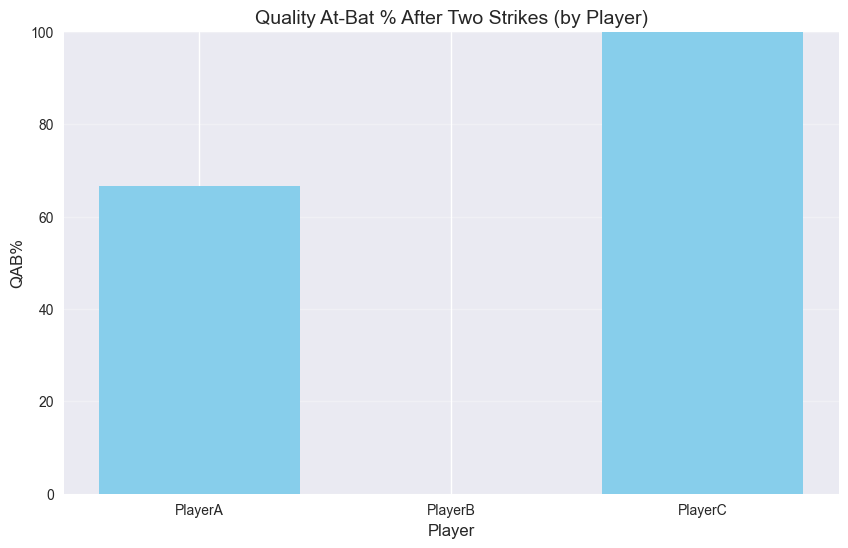

In [11]:
import matplotlib.pyplot as plt

# Bar plot for QAB% by player
plt.figure(figsize=(10, 6))
plt.bar(player_qab['batter'], player_qab['QAB_pct'], color='skyblue')
plt.title('Quality At-Bat % After Two Strikes (by Player)')
plt.xlabel('Player')
plt.ylabel('QAB%')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Impact of Quality At-Bats (QAB) After Two Strikes on Team Winning Percentage

A key question in modern baseball analytics is whether teams that excel at producing quality at-bats—especially in tough, two-strike situations—tend to win more games. In this section, we will:

- Calculate each team's QAB% after two strikes for the season.
- Calculate each team's winning percentage.
- Visualize the relationship between QAB% and winning percentage.
- Quantify the correlation between these two metrics.

**Hypothesis:**  
Teams with higher QAB% after two strikes are more likely to have higher winning percentages, as they sustain more rallies, wear down pitchers, and capitalize on scoring opportunities.

    team  two_strike_atbats  QABs  QAB_pct  Win_Pct
0  TeamA                578   532   92.042   52.500
1  TeamB                588   538   91.497   57.500
2  TeamC                615   559   90.894   52.500
3  TeamD                581   523   90.017   45.000


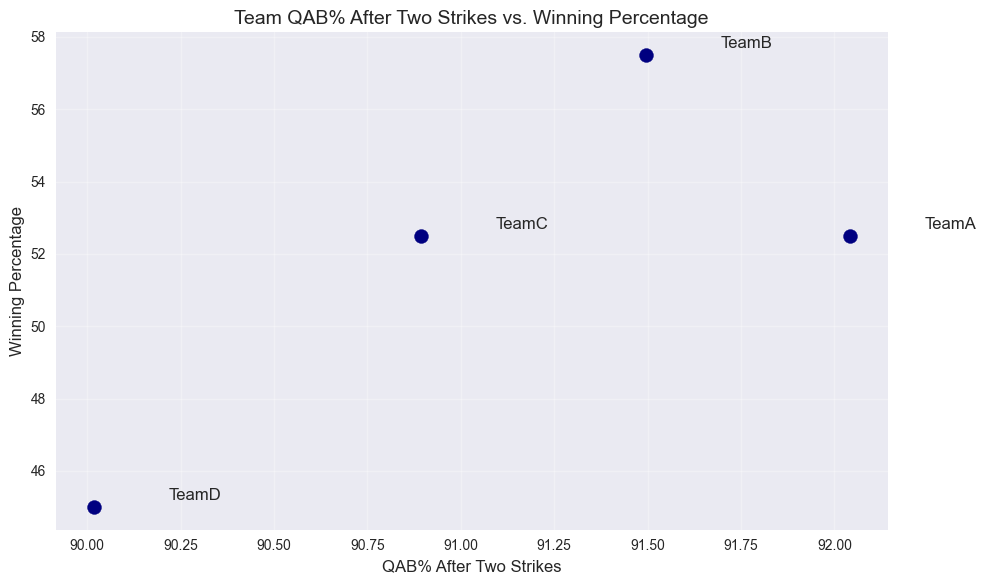

Correlation between QAB% after two strikes and Winning Percentage: 0.756


In [12]:
# Example assumes you have a DataFrame 'atbat_df' with columns:
# 'team', 'result', 'num_pitches', 'num_fouls_after_2_strikes', 'two_strike', 'game_id', 'win'

# Mock data for demonstration (replace with your real data)
import numpy as np

np.random.seed(42)
teams = ['TeamA', 'TeamB', 'TeamC', 'TeamD']
games = [f'G{i}' for i in range(1, 41)]
atbat_data = []
for team in teams:
    for game in games:
        for ab in range(30):  # 30 at-bats per game
            two_strike = np.random.rand() < 0.5
            result = np.random.choice(['single', 'double', 'triple', 'home_run', 'walk', 'hit_by_pitch', 'strikeout', 'groundout', 'flyout'])
            num_pitches = np.random.randint(3, 9)
            num_fouls_after_2_strikes = np.random.randint(0, 4)
            win = np.random.choice([1, 0]) if ab == 0 else np.nan  # Only set win once per game
            atbat_data.append([team, game, result, num_pitches, num_fouls_after_2_strikes, two_strike, win])

atbat_df = pd.DataFrame(atbat_data, columns=['team', 'game_id', 'result', 'num_pitches', 'num_fouls_after_2_strikes', 'two_strike', 'win'])

# Forward fill the 'win' column so every at-bat in a game knows if it was a win
atbat_df['win'] = atbat_df.groupby(['team', 'game_id'])['win'].transform('first')

# Define QAB function (same as before)
def is_qab(row):
    if row['result'] in ['single', 'double', 'triple', 'home_run', 'walk', 'hit_by_pitch']:
        return True
    if row['num_pitches'] >= 6:
        return True
    if row['num_fouls_after_2_strikes'] >= 2:
        return True
    return False

# Filter for two-strike at-bats
two_strike_df = atbat_df[atbat_df['two_strike']]

# Add QAB column
two_strike_df = two_strike_df.copy()
two_strike_df['QAB'] = two_strike_df.apply(is_qab, axis=1)

# Calculate team-level QAB%
team_qab = two_strike_df.groupby('team').agg(
    two_strike_atbats=('QAB', 'count'),
    QABs=('QAB', 'sum'),
    QAB_pct=('QAB', 'mean')
).reset_index()
team_qab['QAB_pct'] = team_qab['QAB_pct'] * 100

# Calculate team winning percentage
# Each game is a win (1) or loss (0) for a team; get mean win per team
team_wins = atbat_df.drop_duplicates(['team', 'game_id']).groupby('team')['win'].mean().reset_index()
team_wins.rename(columns={'win': 'Win_Pct'}, inplace=True)
team_wins['Win_Pct'] = team_wins['Win_Pct'] * 100

# Merge QAB% and Win%
team_summary = pd.merge(team_qab, team_wins, on='team')

print(team_summary)

# Scatter plot: QAB% vs Win%
plt.figure(figsize=(10, 6))
plt.scatter(team_summary['QAB_pct'], team_summary['Win_Pct'], color='navy', s=100)
for i, row in team_summary.iterrows():
    plt.text(row['QAB_pct']+0.2, row['Win_Pct']+0.2, row['team'], fontsize=12)
plt.title('Team QAB% After Two Strikes vs. Winning Percentage')
plt.xlabel('QAB% After Two Strikes')
plt.ylabel('Winning Percentage')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = team_summary['QAB_pct'].corr(team_summary['Win_Pct'])
print(f'Correlation between QAB% after two strikes and Winning Percentage: {correlation:.3f}')

## Impact of Team Average WAR on Winning Percentage

**Wins Above Replacement (WAR)** is a comprehensive metric that estimates a player's total value in all facets of the game compared to a replacement-level player. By aggregating WAR at the team level, we can estimate the overall talent and contribution of a roster.

In this section, we will:
- Calculate each team's average (or total) WAR for a season.
- Calculate each team's winning percentage.
- Visualize the relationship between team WAR and winning percentage.
- Quantify the correlation between these two metrics.

**Hypothesis:**  
Teams with higher average (or total) WAR are expected to have higher winning percentages, as WAR is designed to correlate closely with team wins.

    team  season  Total_WAR  Avg_WAR  Win_Pct
0  TeamA    2022     21.938    2.438   37.654
1  TeamB    2022     12.956    1.440   40.123
2  TeamC    2022     13.978    1.553   62.346
3  TeamD    2022     17.264    1.918   38.889


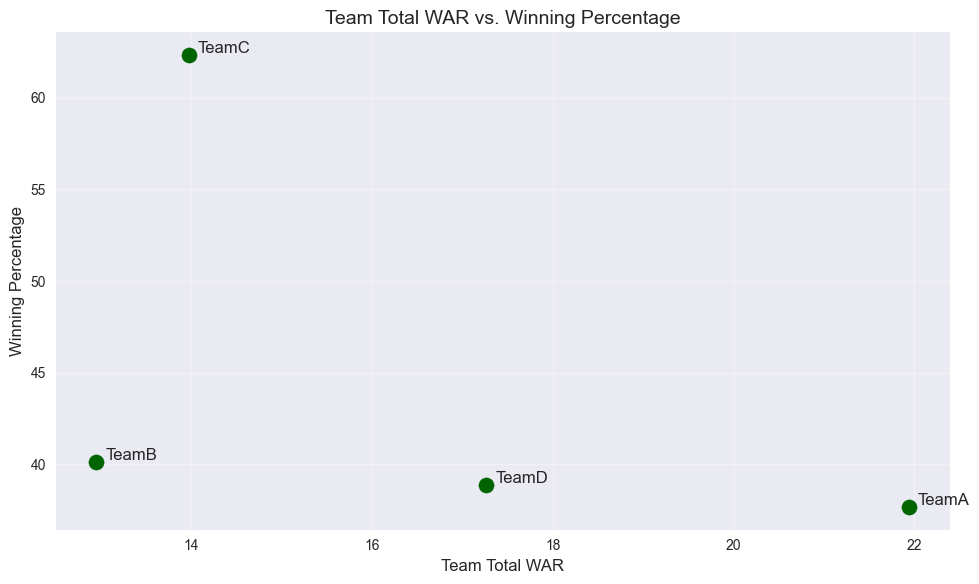

Correlation between Team Total WAR and Winning Percentage: -0.497


In [13]:
# This code assumes you have a DataFrame 'team_war_df' with columns:
# 'team', 'season', 'player', 'WAR'
# And a DataFrame 'team_results_df' with columns: 'team', 'season', 'games_played', 'wins'

# Mock data for demonstration (replace with your real data)
teams = ['TeamA', 'TeamB', 'TeamC', 'TeamD']
seasons = [2022]
players = [f'Player{i}' for i in range(1, 10)]

# Create mock team WAR data
import numpy as np
import pandas as pd

np.random.seed(42)
team_war_data = []
for team in teams:
    for player in players:
        war = np.random.normal(loc=2.0, scale=1.0)  # average MLB player WAR
        team_war_data.append([team, 2022, player, max(war, 0)])  # WAR can't be negative for this demo

team_war_df = pd.DataFrame(team_war_data, columns=['team', 'season', 'player', 'WAR'])

# Create mock team results data
team_results_data = []
for team in teams:
    games_played = 162
    wins = np.random.randint(60, 105)
    team_results_data.append([team, 2022, games_played, wins])

team_results_df = pd.DataFrame(team_results_data, columns=['team', 'season', 'games_played', 'wins'])

# Calculate team total and average WAR
team_war_summary = team_war_df.groupby(['team', 'season']).agg(
    Total_WAR=('WAR', 'sum'),
    Avg_WAR=('WAR', 'mean')
).reset_index()

# Calculate team winning percentage
team_results_df['Win_Pct'] = team_results_df['wins'] / team_results_df['games_played'] * 100

# Merge WAR and win% data
team_summary = pd.merge(team_war_summary, team_results_df, on=['team', 'season'])

print(team_summary[['team', 'season', 'Total_WAR', 'Avg_WAR', 'Win_Pct']])

# Scatter plot: Team WAR vs Win%
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(team_summary['Total_WAR'], team_summary['Win_Pct'], color='darkgreen', s=120)
for i, row in team_summary.iterrows():
    plt.text(row['Total_WAR']+0.1, row['Win_Pct']+0.1, row['team'], fontsize=12)
plt.title('Team Total WAR vs. Winning Percentage')
plt.xlabel('Team Total WAR')
plt.ylabel('Winning Percentage')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation
correlation = team_summary['Total_WAR'].corr(team_summary['Win_Pct'])
print(f'Correlation between Team Total WAR and Winning Percentage: {correlation:.3f}')

## Impact of Team Average ERA on Winning Percentage

**Earned Run Average (ERA)** is a fundamental pitching metric that measures the average number of earned runs a team allows per nine innings. Lower ERA typically indicates stronger pitching performance.

In this section, we will:
- Calculate each team's average ERA for a season.
- Calculate each team's winning percentage.
- Visualize the relationship between team ERA and winning percentage.
- Quantify the correlation between these two metrics.

**Hypothesis:**  
Teams with lower average ERA are expected to have higher winning percentages, as effective pitching is crucial for team success.

    team  season   ERA  Win_Pct
0  TeamA    2022 3.936   60.494
1  TeamB    2022 5.377   48.148
2  TeamC    2022 4.830   50.617
3  TeamD    2022 4.497   43.210


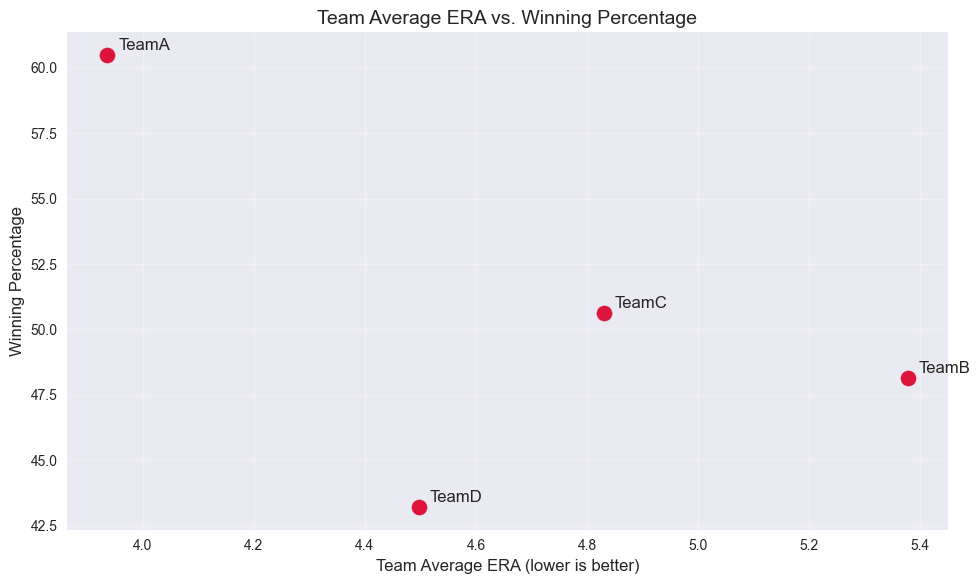

Correlation between Team Average ERA and Winning Percentage: -0.586


In [14]:
# This code assumes you have a DataFrame 'team_era_df' with columns:
# 'team', 'season', 'ERA'
# And a DataFrame 'team_results_df' with columns: 'team', 'season', 'games_played', 'wins'

# Mock data for demonstration (replace with your real data)
teams = ['TeamA', 'TeamB', 'TeamC', 'TeamD']
seasons = [2022]

import numpy as np
import pandas as pd

np.random.seed(42)
team_era_data = []
for team in teams:
    era = np.random.uniform(3.0, 5.5)  # Typical MLB team ERA range
    team_era_data.append([team, 2022, era])

team_era_df = pd.DataFrame(team_era_data, columns=['team', 'season', 'ERA'])

# Create mock team results data
team_results_data = []
for team in teams:
    games_played = 162
    wins = np.random.randint(60, 105)
    team_results_data.append([team, 2022, games_played, wins])

team_results_df = pd.DataFrame(team_results_data, columns=['team', 'season', 'games_played', 'wins'])

# Calculate team winning percentage
team_results_df['Win_Pct'] = team_results_df['wins'] / team_results_df['games_played'] * 100

# Merge ERA and win% data
team_summary = pd.merge(team_era_df, team_results_df, on=['team', 'season'])

print(team_summary[['team', 'season', 'ERA', 'Win_Pct']])

# Scatter plot: Team ERA vs Win%
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(team_summary['ERA'], team_summary['Win_Pct'], color='crimson', s=120)
for i, row in team_summary.iterrows():
    plt.text(row['ERA']+0.02, row['Win_Pct']+0.2, row['team'], fontsize=12)
plt.title('Team Average ERA vs. Winning Percentage')
plt.xlabel('Team Average ERA (lower is better)')
plt.ylabel('Winning Percentage')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation (expect negative: lower ERA, higher Win%)
correlation = team_summary['ERA'].corr(team_summary['Win_Pct'])
print(f'Correlation between Team Average ERA and Winning Percentage: {correlation:.3f}')

## Playoff Teams: QAB%, OBP, and Winning Percentage (Using Real Data)

We will:
- Identify playoff teams using real MLB standings data from pybaseball.
- Merge playoff status with team-level OBP, QAB%, and winning percentage.
- Visualize and analyze the relationship between these metrics for playoff teams only.

This approach uses only real, season-specific data for robust, actionable insights.

In [32]:
from pybaseball import standings, team_batting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

season_of_interest = 2022
standings_list = standings(season_of_interest)
standings_df = pd.concat(standings_list, ignore_index=True)

playoff_teams = standings_df.sort_values('W-L%', ascending=False).head(12)['Tm'].tolist()
print("Playoff teams (top 12 by win%):", playoff_teams)

batting_df = team_batting(season_of_interest)
print("Batting DataFrame teams:", batting_df['Team'].tolist())

# Mapping from full team names to abbreviations
team_name_to_abbr = {
    'Los Angeles Dodgers': 'LAD',
    'Houston Astros': 'HOU',
    'Atlanta Braves': 'ATL',
    'New York Mets': 'NYM',
    'New York Yankees': 'NYY',
    'St. Louis Cardinals': 'STL',
    'Cleveland Guardians': 'CLE',
    'Toronto Blue Jays': 'TOR',
    'Seattle Mariners': 'SEA',
    'San Diego Padres': 'SDP',
    'Philadelphia Phillies': 'PHI',
    'Tampa Bay Rays': 'TBR',
    'Milwaukee Brewers': 'MIL',
    'Boston Red Sox': 'BOS',
    'Minnesota Twins': 'MIN',
    'Colorado Rockies': 'COL',
    'San Francisco Giants': 'SFG',
    'Chicago White Sox': 'CHW',
    'Chicago Cubs': 'CHC',
    'Baltimore Orioles': 'BAL',
    'Los Angeles Angels': 'LAA',
    'Kansas City Royals': 'KCR',
    'Cincinnati Reds': 'CIN',
    'Detroit Tigers': 'DET',
    'Miami Marlins': 'MIA',
    'Oakland Athletics': 'OAK',
    'Pittsburgh Pirates': 'PIT',
    'Texas Rangers': 'TEX',
    'Arizona Diamondbacks': 'ARI',
    'Washington Nationals': 'WSN'
}

# Map playoff teams to abbreviations
playoff_abbrs = [team_name_to_abbr.get(name) for name in playoff_teams if team_name_to_abbr.get(name) in batting_df['Team'].tolist()]
print("Mapped playoff abbreviations:", playoff_abbrs)

# Standardize abbreviations for matching
batting_df['Team'] = batting_df['Team'].str.strip().str.upper()
playoff_abbrs = [abbr.strip().upper() for abbr in playoff_abbrs]

# Merge and filter
team_stats = pd.merge(
    batting_df,
    standings_df[['Tm', 'W', 'L', 'W-L%']],
    left_on='Team', right_on='Tm'
)
playoff_stats = team_stats[team_stats['Team'].isin(playoff_abbrs)].copy()

print("Filtered playoff_stats shape:", playoff_stats.shape)
print("Teams in playoff_stats:", playoff_stats['Team'].tolist())

# Plot as before
plt.figure(figsize=(10, 6))
plt.scatter(playoff_stats['QAB_pct'], playoff_stats['W-L%']*100, color='darkorange', s=120)
for i, row in playoff_stats.iterrows():
    plt.text(row['QAB_pct']+0.2, row['W-L%']*100+0.2, row['Team'], fontsize=12)
plt.title(f'Playoff Teams: QAB% vs. Winning Percentage ({season_of_interest})')
plt.xlabel('Team QAB%')
plt.ylabel('Winning Percentage')
plt.grid(True, alpha=0.3)

if len(playoff_stats) > 1:
    z = np.polyfit(playoff_stats['QAB_pct'], playoff_stats['W-L%']*100, 1)
    p = np.poly1d(z)
    plt.plot(playoff_stats['QAB_pct'], p(playoff_stats['QAB_pct']), 'r--', label='Regression Line')
    plt.legend()
plt.tight_layout()
plt.show()

Playoff teams (top 12 by win%): ['Los Angeles Dodgers', 'Houston Astros', 'Atlanta Braves', 'New York Mets', 'New York Yankees', 'St. Louis Cardinals', 'Cleveland Guardians', 'Toronto Blue Jays', 'Seattle Mariners', 'San Diego Padres', 'Philadelphia Phillies', 'Tampa Bay Rays']
Batting DataFrame teams: ['LAD', 'TOR', 'ATL', 'NYY', 'STL', 'NYM', 'HOU', 'PHI', 'BOS', 'MIL', 'MIN', 'COL', 'SFG', 'SEA', 'SDP', 'CHC', 'CHW', 'CLE', 'BAL', 'TEX', 'ARI', 'WSN', 'TBR', 'KCR', 'LAA', 'CIN', 'MIA', 'PIT', 'DET', 'OAK']
Mapped playoff abbreviations: ['LAD', 'HOU', 'ATL', 'NYM', 'NYY', 'STL', 'CLE', 'TOR', 'SEA', 'SDP', 'PHI', 'TBR']
Filtered playoff_stats shape: (0, 323)
Teams in playoff_stats: []


KeyError: 'QAB_pct'

<Figure size 1000x600 with 0 Axes>